# Парсим данные. Лог - accuracy


In [ ]:
import numpy as np

for covar_type in ['spherical', 'diag', 'tied','full']: 
    fh = open('AccuracyLog-'+covar_type+'.txt')
    a = fh.read()
    t=a.split()

    tr_a = open('./Calculate/AccuracyTrainLog-'+covar_type+'.csv', 'w')
    test_a = open('./Calculate/AccuracyTestLog-'+covar_type+'.csv', 'w')
    
    # Вытаскиваем trainAccuracy
    for i in range(10,len(t),36):
        tr_a.write(t[i])
        tr_a.write (',')
        
    # Вытаскиваем TestAcceracy
    for i in range(13,len(t),36):
        test_a.write(t[i])
        test_a.write (',')


# Plot data ( accuracy/gaussian_core)


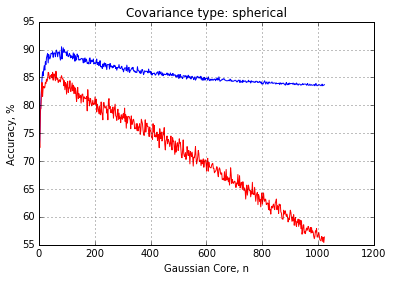

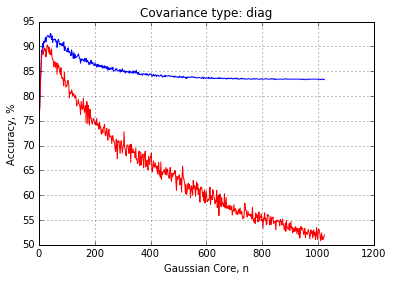

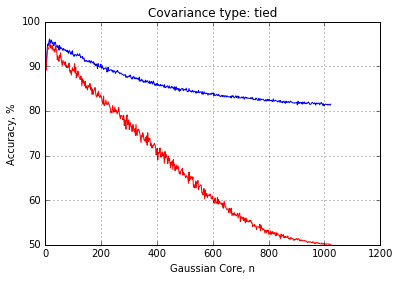

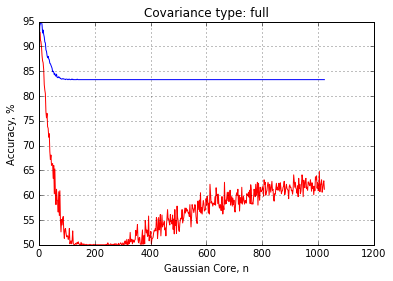

In [2]:
from numpy import genfromtxt
import matplotlib.pyplot as plt

%matplotlib inline

number_gaussian = range(1,1024,2)

for covar_type in ['spherical', 'diag', 'tied','full']: 
    train_set = genfromtxt('./Calculate/AccuracyTrainLog-' + covar_type +'.csv', delimiter=',')
    test_set = genfromtxt('./Calculate/AccuracyTestLog-' + covar_type +'.csv', delimiter=',')
    plt.figure()
    plt.title('Covariance type: ' + covar_type)
    tr_a = plt.plot(number_gaussian,train_set,color = 'b')
    tes_a = plt.plot(number_gaussian,test_set, color  = 'r')
    plt.xlabel('Gaussian Core, n')
    plt.ylabel('Accuracy, %')
    plt.grid(True)
    plt.savefig(covar_type)
    plt.show()

In [25]:
for covar_type in ['spherical', 'diag', 'tied','full']: 
    train_set = genfromtxt('./Calculate/AccuracyTrainLog-' + covar_type +'.csv', delimiter=',')
    print 'Max accuracy TrainSet = ', np.max(train_set), ', covar_rype = ', covar_type
    ix = np.in1d(train_set.ravel(), np.max(train_set))
    print 'nummer gaussian core = ', np.where(ix)[0].astype('int')* 2 + 1
    

Max accuracy TrainSet =  90.5 , covar_rype =  spherical
nummer gaussian core =  [81]
Max accuracy TrainSet =  92.6 , covar_rype =  diag
nummer gaussian core =  [41]
Max accuracy TrainSet =  96.1 , covar_rype =  tied
nummer gaussian core =  [15]
Max accuracy TrainSet =  95.0 , covar_rype =  full
nummer gaussian core =  [7]


# Parse Confusion Log


In [2]:
import numpy as np
from numpy import genfromtxt

for covar_type in ['spherical', 'diag', 'tied','full']: 
    fh = open('./Confusion/ConfusionLog-'+covar_type+'.txt')
    a = fh.read()
    t= a.split()

    wr = open('./Confusion/C_log-'+covar_type+'.csv', 'w')

    for n in range(0, len(t)/13):
        for i in range(9, 13):
            #print 't[', i, '] = ', t[i + n*13]
            wr.write(t[i + n*13] + ';')


# Plot (confusion/gaussians core). FRR

2049
512


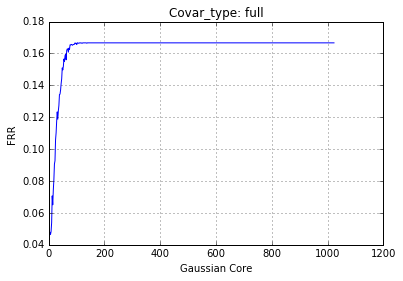

2049
512


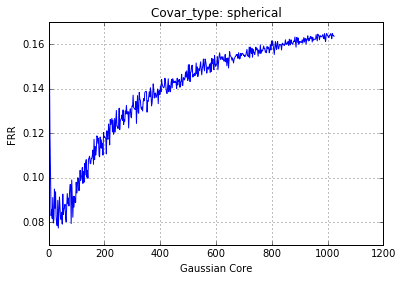

2049
512


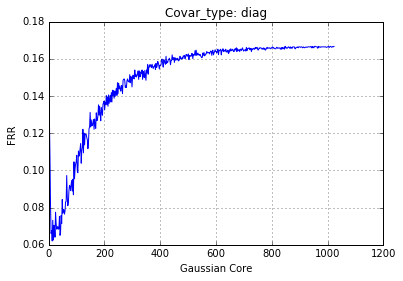

2049
512


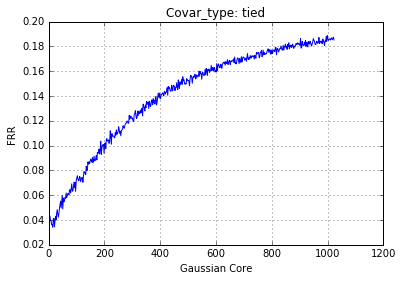

In [59]:
from numpy import genfromtxt
import matplotlib.pyplot as plt

%matplotlib inline

number_gaussian = range(1,1024,2)


for covar_type in ['full','spherical', 'diag', 'tied']: 
    matrix = []
    conf_set = genfromtxt('./Confusion/C_log-' + covar_type +'.csv', delimiter=';')
    print len(conf_set)
    for n in range ( 0, len(conf_set)/4):
        matrix.append((conf_set[n*4+2])/3948)
    print len(matrix)    
    plt.figure()
    plt.title('Covar_type: ' + covar_type)
    tr_a = plt.plot(number_gaussian,matrix,color = 'b')
    plt.xlabel('Gaussian Core')
    plt.ylabel('FRR')
    plt.grid(True)
    plt.savefig('./Confusion/' + covar_type + 'FRR')
    plt.show()   
    #print matrix

# Plot (confusion/gaussians core). FAR

2049
512


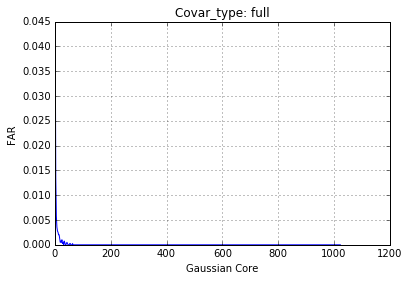

2049
512


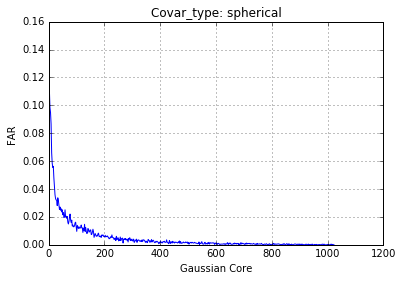

2049
512


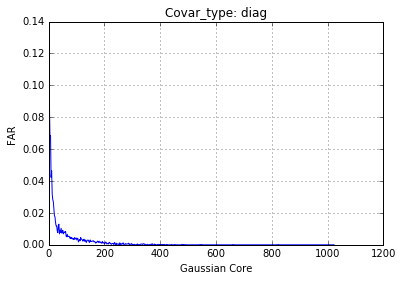

2049
512


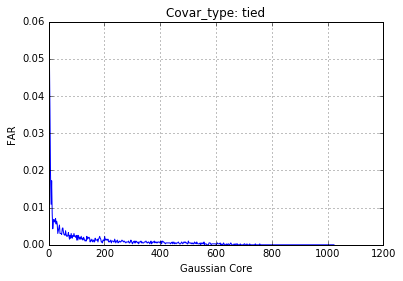

In [51]:
from numpy import genfromtxt
import matplotlib.pyplot as plt

%matplotlib inline

number_gaussian = range(1,1024,2)


for covar_type in ['full','spherical', 'diag', 'tied']: 
    matrix = []
    conf_set = genfromtxt('./Confusion/C_log-' + covar_type +'.csv', delimiter=';')
    print len(conf_set)
    for n in range ( 0, len(conf_set)/4):
        matrix.append((conf_set[n*4+1])/3948)
    print len(matrix)    
    plt.figure()
    plt.title('Covar_type: ' + covar_type)
    tr_a = plt.plot(number_gaussian,matrix,color = 'b')
    plt.xlabel('Gaussian Core')
    plt.ylabel('FAR')
    plt.grid(True)
    plt.savefig('./Confusion/' + covar_type + 'FAR')
    plt.show()   
    #print matrix

# Plot FAR/FRR

512


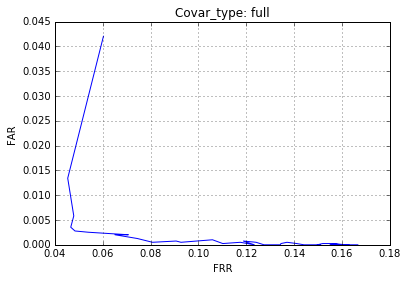

512


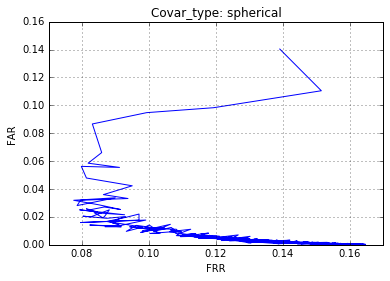

512


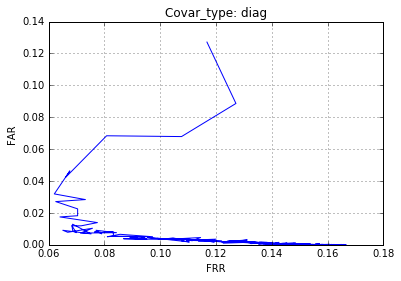

512


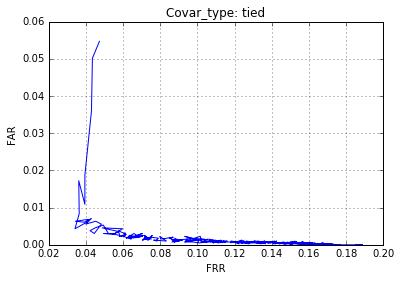

In [50]:
from numpy import genfromtxt
import matplotlib.pyplot as plt

%matplotlib inline

number_gaussian = range(1,1024,2)


for covar_type in ['full','spherical', 'diag', 'tied']: 
    FAR = []
    FRR = []
    conf_set = genfromtxt('./Confusion/C_log-' + covar_type +'.csv', delimiter=';')
    #print len(conf_set)
    
    #FRR
    for n in range ( 0, len(conf_set)/4):
        FAR.append((conf_set[n*4+1])/3948)
    #FAR    
    for n in range ( 0, len(conf_set)/4):
        FRR.append((conf_set[n*4+2])/3948)
    print len(FRR)    
    
    
    plt.figure()
    plt.title('Covar_type: ' + covar_type)
    tr_a = plt.plot(FRR,FAR,color = 'b')
    plt.xlabel('FRR')
    plt.ylabel('FAR')
    plt.grid(True)
    plt.savefig('./Confusion/' + covar_type + 'FAR-FRR')
    plt.show()   
    #print matrix

# Parse TIME Log

In [42]:
import numpy as np
from numpy import genfromtxt

for covar_type in [ 'full']: 
    fh = open('./Time/LogCoreTime-'+covar_type+'.txt')
    a = fh.read()
    t= a.split()

    wr = open('./Time/TimeG_Log-'+covar_type+'.txt', 'w')
    print len(t)/12
    for i in range(1, len(t)/12+1):
        #print 't[', i, '] = ', t[i*12-1]
        wr.write(t[i*12-1] + ';')


512


# Time Core

512
512


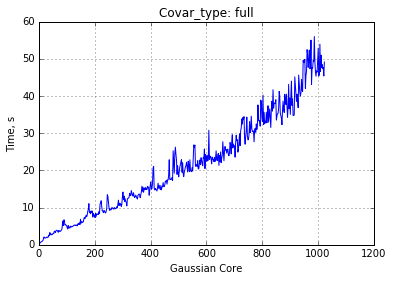

512
512


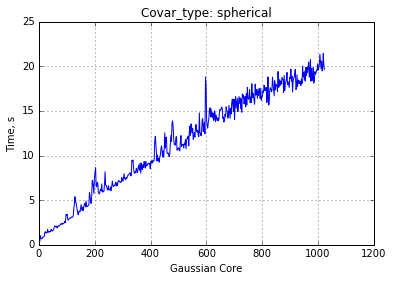

512
512


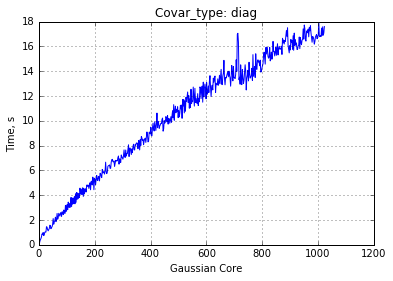

512
512


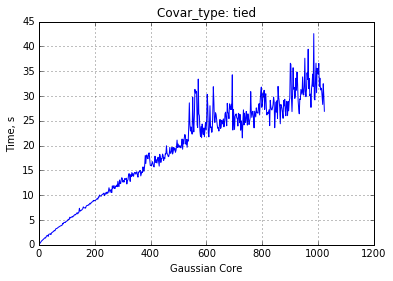

In [52]:
from numpy import genfromtxt
import matplotlib.pyplot as plt

%matplotlib inline

number_gaussian = range(1,1024,2)


for covar_type in ['full','spherical', 'diag', 'tied']: 
    matrix = []
    conf_set = genfromtxt('./Time/TimeG_Log-' + covar_type +'.txt', delimiter=';')
    print len(conf_set)
    for n in range ( 0, len(conf_set)):
        matrix.append(conf_set[n])
    print len(matrix)    
    plt.figure()
    plt.title('Covar_type: ' + covar_type)
    tr_a = plt.plot(number_gaussian,matrix,color = 'b')
    plt.xlabel('Gaussian Core')
    plt.ylabel('Time, s')
    plt.grid(True)
    plt.savefig('./Time/' + covar_type + '_Time_core')
    plt.show() 

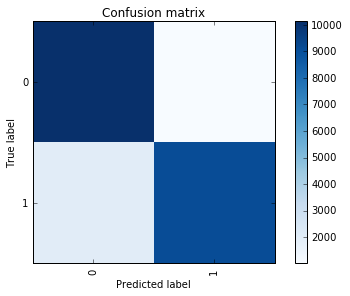

In [4]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def plot_confusion_matrix(cm, labels, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=90)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# ваш код:
cm = np.array([[10128,  1011], [2014, 9125]])
plt.figure()
plot_confusion_matrix(cm, '01')


